In a logit regression model, the dependent variable is categorical (binary: true, false, etc.).

In [ ]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14
from sklearn.utils import check_random_state

In [2]:
from sklearn.linear_model import LogisticRegression

def make_two_blobs(n_samples=400, cluster_std=2., random_state=42):
    rng = check_random_state(random_state)
    X = rng.multivariate_normal([5,0], [[cluster_std**2, 0], [0., cluster_std**2]],
                                size=n_samples//2)
    
    X2 = rng.multivariate_normal([0, 5.], [[cluster_std**2, 0], [0., cluster_std**2]],
                                 size=n_samples//2)
    X = np.vstack((X, X2))
    return X, np.hstack((np.ones(n_samples//2), np.zeros(n_samples//2)))

X, y = make_two_blobs()
labels = ['b', 'r']
y = np.take(labels, (y < 0.5))

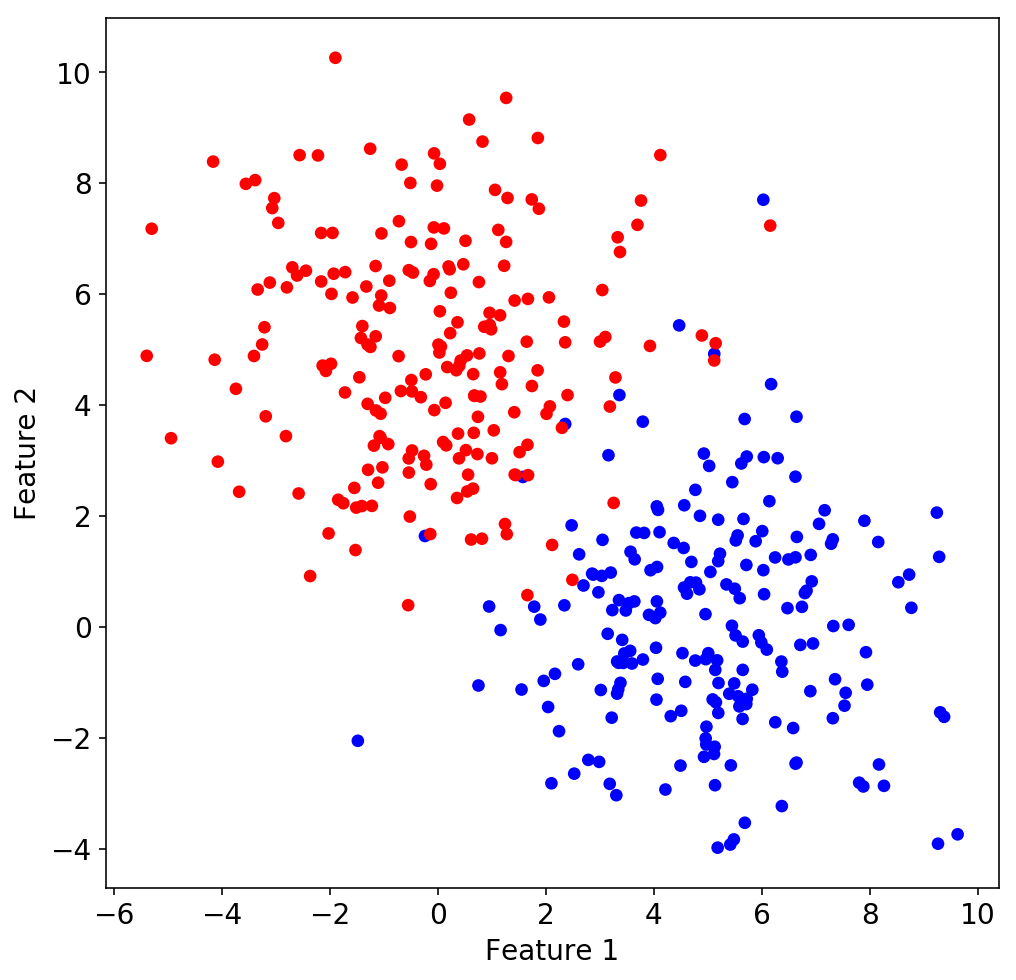

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y, lw=0, s=40)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

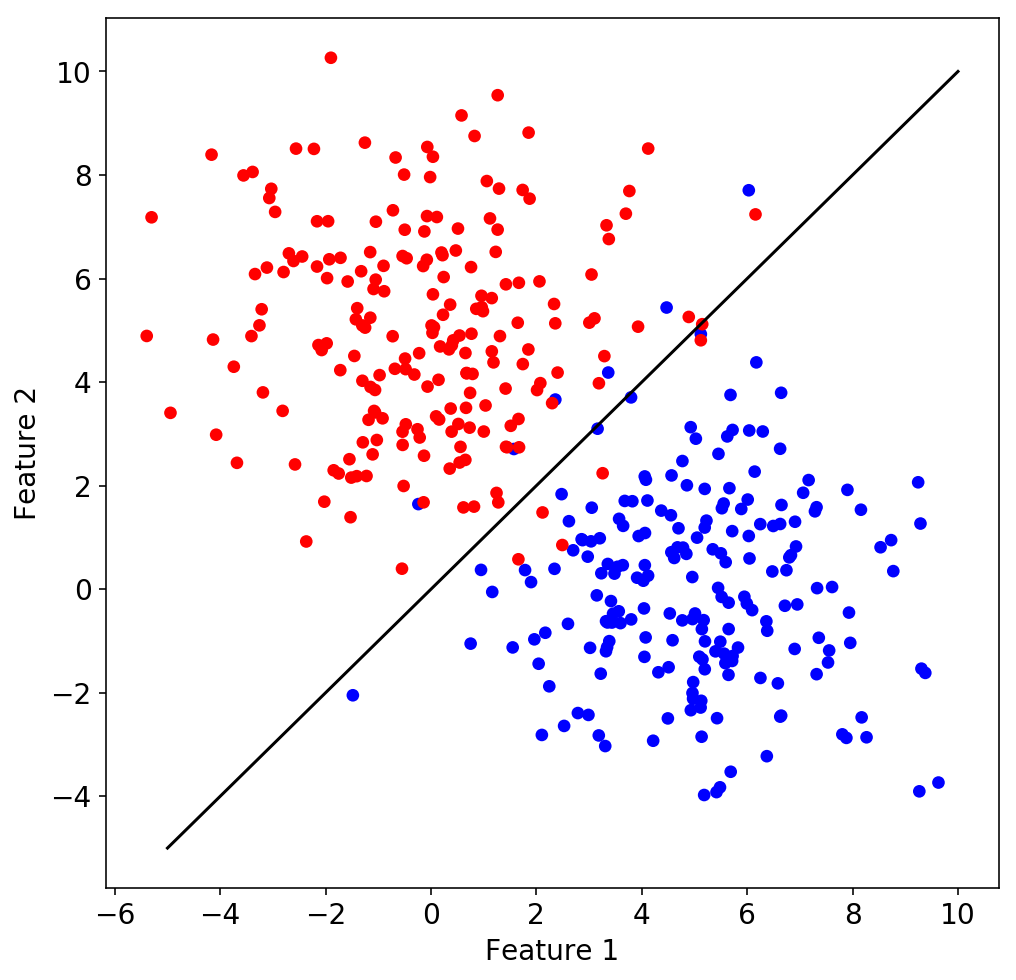

In [26]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

line = np.linspace(-5, 10, 100).reshape(-1, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, lw=0, s=40)
plt.plot(line, line, '-k')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

One cluster of data is centered a (0,5) while the other is at (5,0). Since the data are normaly distributed, a simple linear function y=x should be enough to separate the clusters.

In [35]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

rgr = LogisticRegression()
rgr.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [83]:


coef=rgr.coef_
intercept = rgr.intercept_
print(coef)
print(intercept)

[[-1.39499232  1.50100056]]
[-0.14607058]


In [88]:
def line(x0):
    return (-(x0 * coef[0, 0]) - intercept[0]) / coef[0, 1]


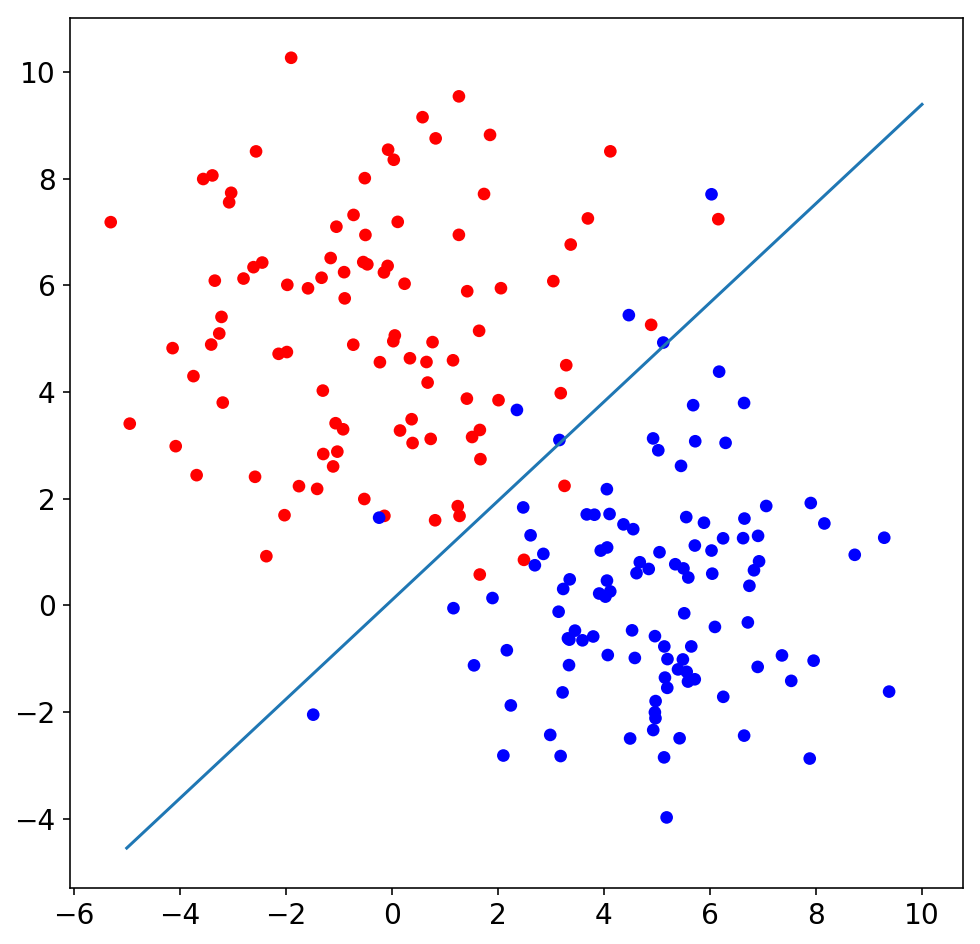

In [95]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, lw=0, s=40)
plt.plot([-5., 10.], [line(-5.), line(10.)],
                 ls="-")

ValueError: could not convert string to float: 'b'

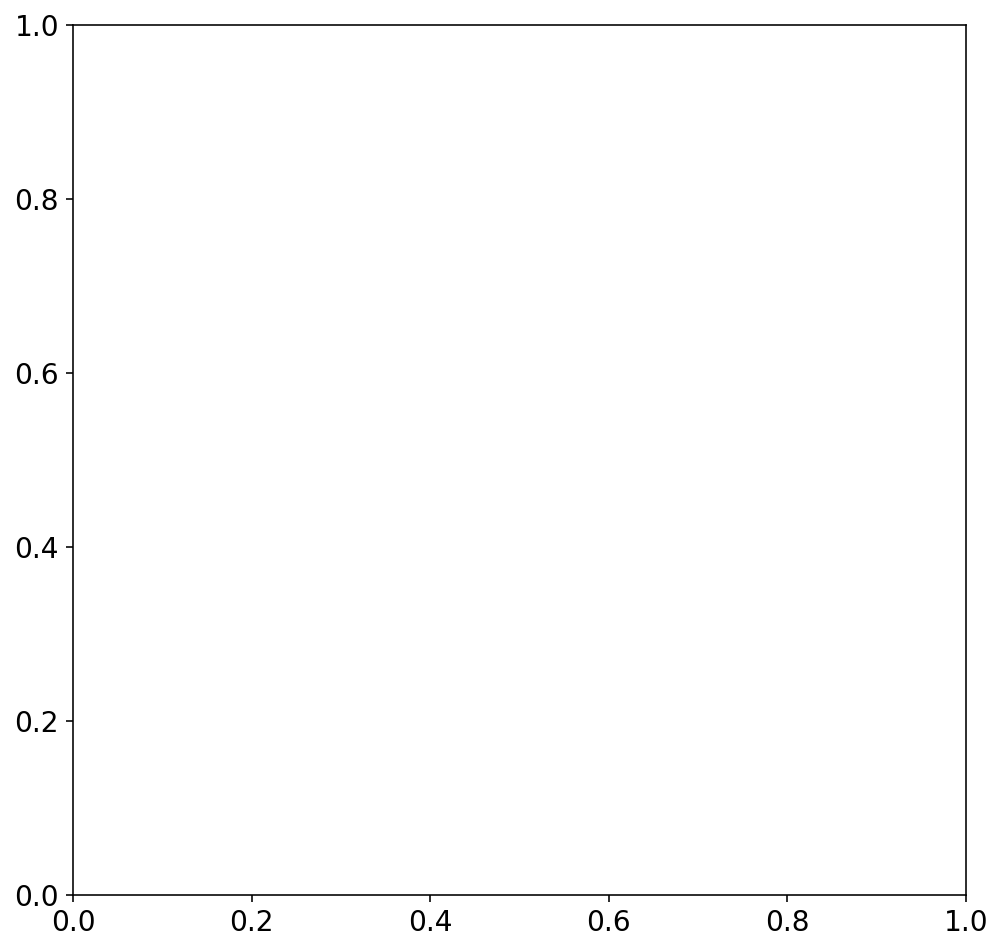

In [144]:
h=.05
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = rgr.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.scatter(xx, yy, c=Z, lw=0, s=40)


In [154]:
coef_1=[]
coef_2=[]
interc=[]

for n in range(20):
    X, y = make_two_blobs(n_samples=400, centers=23, random_state=42+n)
    labels = ['b', 'r']
    y = np.take(labels, (y < 0.5))
    rgr.fit(X, y)
    coef=rgr.coef_
    intercept = rgr.intercept_
    coef_1.append(coef[0, 0])
    coef_2.append(coef[0, 1])
    interc.append(intercept[0])
    
plt.plot(range(1,20), coef_1, '-r', alpha=0.1)


TypeError: make_two_blobs() got an unexpected keyword argument 'centers'